In [1]:
import math
import audiolazy as al
import pyaudio as pa

In [98]:
def playlist(freq, timestep,sampling):
    #Accepts a list of frequencies and plays them with timestep lag
    # Setup ----------------------
    rate = sampling
    s, Hz = al.sHz(rate)
    ms = 1e-3 * s
    # Note queue -----------------
    note_init = al.karplus_strong(int(freq[0]) * Hz)
    notes = note_init
    for i in range(1,len(freq)):
        notes += al.zeros(timestep * i * ms).append(al.karplus_strong(freq[i] * Hz))
    notes *= 0.5
    sound = notes.take(10 * s)
    with al.AudioIO(True) as player: # True means "wait for all sounds to stop"
        player.play(sound, rate=rate)

In [65]:
#playlist([440,880,100,200,300,400,500,600,700,800,900],300)
playlist([100,200,300,400],300,31415) #Bach??

In [6]:
#Experimenting with AudioIO module
with al.AudioIO(True) as player:
    player.play([500], rate= 64000)

In [26]:
#Conversion interactions
#Basic imports -------------------------------
from selenium import webdriver
browser = webdriver.Chrome(r'C:\Users\Syris Norelli\Downloads\ChromeDriver\ChromeDriver.exe')
wait = browser.implicitly_wait(10)
find_css = browser.find_element_by_css_selector
find_xpath = browser.find_element_by_xpath
#Grabbing freq <-> note <-> midi info --------
wait
browser.get('http://glassarmonica.com/science/frequency_midi.php')
conversions = find_xpath('//*[@id="main"]/table/tbody/tr/td[1]/table/tbody').text
conversions = [x.split(' ') for x in conversions.split('\n')[1:]]
print(conversions)

[['21', 'A0', '27.5'], ['22', 'A#0', '29.1'], ['23', 'B0', '30.9'], ['24', 'C1', '32.7'], ['25', 'C#1', '34.6'], ['26', 'D1', '36.7'], ['27', 'D#1', '38.9'], ['28', 'E1', '41.2'], ['29', 'F1', '43.7'], ['30', 'F#1', '46.2'], ['31', 'G1', '49.0'], ['32', 'G#1', '51.9'], ['33', 'A1', '55.0'], ['34', 'A#1', '58.3'], ['35', 'B1', '61.7'], ['36', 'C2', '65.4'], ['37', 'C#2', '69.3'], ['38', 'D2', '73.4'], ['39', 'D#2', '77.8'], ['40', 'E2', '82.4'], ['41', 'F2', '87.3'], ['42', 'F#2', '92.5'], ['43', 'G2', '98.0'], ['44', 'G#2', '103.8'], ['45', 'A2', '110.0'], ['46', 'A#2', '116.5'], ['47', 'B2', '123.5'], ['48', 'C3', '130.8'], ['49', 'C#3', '138.6'], ['50', 'D3', '146.8'], ['51', 'D#3', '155.6'], ['52', 'E3', '164.8'], ['53', 'F3', '174.6'], ['54', 'F#3', '185.0'], ['55', 'G3', '196.0'], ['56', 'G#3', '207.7'], ['57', 'A3', '220.0'], ['58', 'A#3', '233.1'], ['59', 'B3', '246.9'], ['60', 'C4', '261.6'], ['61', 'C#4', '277.2'], ['62', 'D4', '293.7'], ['63', 'D#4', '311.1'], ['64', 'E4', '3

In [35]:
frequencies = [float(x[2]) for x in conversions]
playlist(frequencies[50:70],200,31415)

[27.5, 29.1, 30.9, 32.7, 34.6, 36.7, 38.9, 41.2, 43.7, 46.2, 49.0, 51.9, 55.0, 58.3, 61.7, 65.4, 69.3, 73.4, 77.8, 82.4, 87.3, 92.5, 98.0, 103.8, 110.0, 116.5, 123.5, 130.8, 138.6, 146.8, 155.6, 164.8, 174.6, 185.0, 196.0, 207.7, 220.0, 233.1, 246.9, 261.6, 277.2, 293.7, 311.1, 329.6, 349.2, 370.0, 392.0, 415.3, 440.0, 466.2, 493.9, 523.3, 554.4, 587.3, 622.3, 659.3, 698.5, 740.0, 784.0, 830.6, 880.0, 932.3, 987.8, 1046.5, 1108.7, 1174.7, 1244.5, 1318.5, 1396.9, 1480.0, 1568.0, 1661.2, 1760.0, 1864.7, 1975.5, 2093.0, 2217.5, 2349.3, 2489.0, 2637.0, 2793.8, 2960.0, 3136.0, 3322.4, 3520.0, 3729.3, 3951.1, 4186.0]
88


In [62]:
def playlistChords(freq, timestep, sampling):
    #Accepts a list of same-time frequencies and plays them with timestep lag
    # Setup ----------------------
    rate = int(sampling)
    s, Hz = al.sHz(rate)
    ms = 1e-3 * s
    # Note queue -----------------
    note_init = al.karplus_strong(int(freq[0]) * Hz)
    notes = note_init
    
    for i in range(1,len(freq)):
        if isinstance(freq[i],list) == True:
            for j in range(len(freq[i])):
                notes += al.zeros(timestep * i * ms + j * ms).append(al.karplus_strong(freq[i][j] * Hz))
        else:
            notes += al.zeros(timestep * i * ms).append(al.karplus_strong(freq[i] * Hz))
    
    notes *= 0.5
    sound = notes.take(10 * s)
    with al.AudioIO(True) as player: # True means "wait for all sounds to stop"
        player.play(sound, rate=rate)

In [64]:
playlistChords([300,[440,880],400,500,[400,800,1200,1600]],300,31415)

In [112]:
def applyEquationMapping(data,ranges):
    data = [1/(1+math.e**-i) for i in data] # <------- Feel free to change this equation
    #Don't mess with this line:
    data = [(x-min(data))/(max(data)-min(data))*(ranges[1]-ranges[0])+ranges[0] for x in data]
    return data

[200.0, 200.00000460413565, 200.0000171194738, 200.0000511396888, 200.00014361621206, 200.00039499339832, 200.00107830694452, 200.00293574211008, 200.00798474754438, 200.0217091690692, 200.05901455026574, 200.16041027051176, 200.43595249344784, 201.18436388229804, 203.21440744876057, 208.70070358875236, 223.38207045041835, 261.6536329238475, 354.96379713688793, 549.6238477809936, 850.0000023020677, 1150.376156823142, 1345.0362074672476, 1438.3463716802883, 1476.6179341537174, 1491.2993010153834, 1496.7855971553752, 1498.8156407218378, 1499.564052110688, 1499.8395943336238, 1499.94099005387, 1499.9782954350667, 1499.9920198565912, 1499.9970688620256, 1499.998926297191, 1499.9996096107373, 1499.9998609879237, 1499.999953464447, 1499.999987484662, 1500.0]


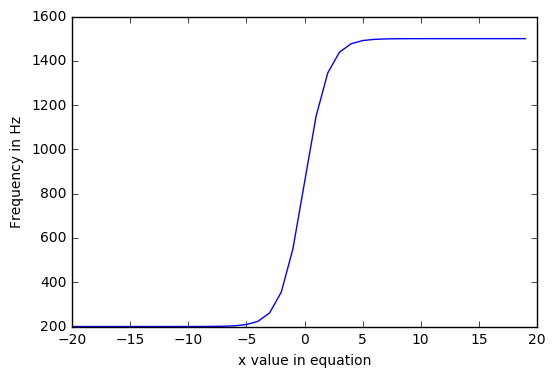

In [114]:
parabola = applyEquationMapping(range(-20,20),[200,1500])
print(parabola)
import matplotlib.pyplot as pypl
pypl.plot([x for x in range(-20,20)],parabola)
pypl.ylabel('Frequency in Hz')
pypl.xlabel('x value in equation')
pypl.show()

In [115]:
playlist(parabola,300,31415)
#Way of finding what note is currently playing?